In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
%pylab inline
import matplotlib.image as mpimg
import random
import math 
from random import choice
import statistics 

Populating the interactive namespace from numpy and matplotlib


In [2]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [3]:
file=r'sudoku.png'
img = cv2.imread(file,0)
img.shape

(1200, 1200)

In [4]:
#initial image 
image = Image.open('sudoku.png')
image.show()

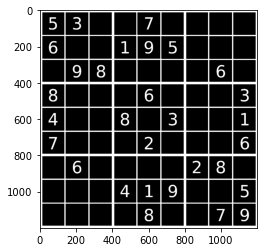

In [5]:
#digits extraction from image

#thresholding 
thresh,img_binary_inv = cv2.threshold(img,128,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
#img_binary_inv = 255 - img_binary 
cv2.imwrite('sudoku_binary.png',img_binary_inv)

plotting = plt.imshow(img_binary_inv,cmap='gray')
plt.show()

In [6]:
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 70));
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (70, 1));

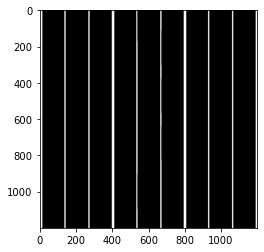

In [7]:
vertical_img = cv2.erode(img_binary_inv, vertical_kernel, iterations=1)
cv2.imwrite("vertical_img.jpg", vertical_img)
plotting = plt.imshow(vertical_img,cmap='gray')
plt.show()

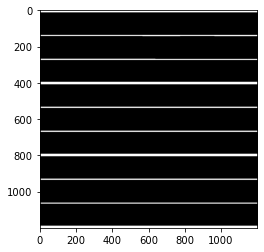

In [8]:
horizontal_img = cv2.erode(img_binary_inv, horizontal_kernel, iterations=1)
cv2.imwrite("horizontal_img.jpg", horizontal_img)
plotting = plt.imshow(horizontal_img,cmap='gray')
plt.show()

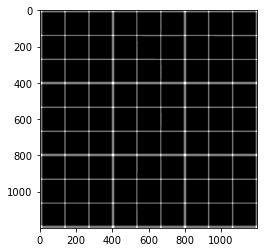

In [9]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
img_vh = cv2.addWeighted(vertical_img, 0.5, horizontal_img, 0.5, 0.0)

plotting = plt.imshow(img_vh,cmap='gray')
plt.show()

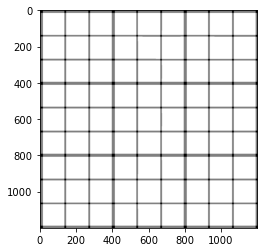

In [10]:

img_vh = cv2.erode(~img_vh, kernel, iterations=3)
plotting = plt.imshow(img_vh,cmap='gray')
plt.show()

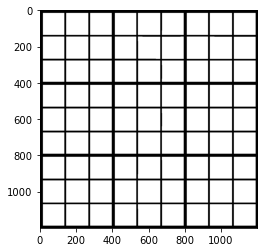

In [11]:
thresh ,img_vh = cv2.threshold(img_vh, 128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite('image_vh.jpg', img_vh)
plotting = plt.imshow(img_vh,cmap='gray')
plt.show()

In [12]:
contours , hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [13]:
def sortContours(contours):
    i = 1
    bbox = [cv2.boundingRect(c) for c in contours]
    (contours, bbox) = zip(*sorted(zip(contours, bbox),
    key = lambda b:b[1][i], reverse = False))
    return contours, bbox

In [14]:
contours, bbox = sortContours(contours)

In [15]:
#define the right location each cell
heights = [bbox[i][3] for i in range(len(bbox))]
mean = np.mean(heights)
mean

119.93827160493827

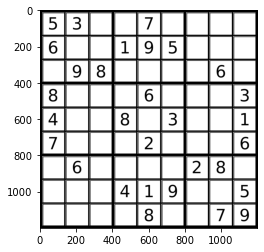

In [16]:
# rectangles around all the boxes
box = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    if(w < 200 and h < 200):
        img_bb = cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)
        box.append([x,y,w,h])
    
plotting = plt.imshow(img_bb,cmap='gray')
plt.show()

In [17]:
len(box)

81

In [18]:
rows = []
columns = []
j=0

for i in range(len(box)):
    if(i == 0):
        columns.append(box[i])
        previous=box[i]
    else:
        if(box[i][1]<=previous[1]+mean/2):
            columns.append(box[i])
            previous = box[i]
            
            if(i ==len(box)- 1):
                rows.append(columns)
        else:
            rows.append(columns)
            columns=[]
            previous=box[i]
            columns.append(box[i])
            
#print(columns)
print(rows)

[[[1067, 16, 120, 121], [935, 16, 122, 121], [808, 16, 117, 121], [671, 16, 120, 121], [539, 16, 123, 121], [412, 16, 118, 121], [276, 16, 119, 121], [144, 16, 122, 121], [16, 16, 118, 121]], [[935, 146, 122, 123], [808, 146, 117, 123], [671, 146, 120, 123], [539, 146, 123, 123], [412, 146, 118, 122], [276, 146, 119, 122], [144, 146, 122, 122], [16, 146, 118, 122], [1067, 147, 120, 122]], [[1067, 278, 120, 117], [935, 278, 122, 117], [808, 278, 117, 117], [671, 278, 120, 117], [540, 278, 122, 117], [412, 278, 118, 117], [276, 278, 119, 117], [144, 278, 122, 117], [16, 278, 118, 117]], [[1067, 412, 120, 120], [935, 412, 122, 120], [808, 412, 117, 120], [671, 412, 120, 120], [540, 412, 122, 120], [412, 412, 118, 120], [276, 412, 119, 120], [144, 412, 122, 120], [16, 412, 118, 120]], [[1067, 542, 120, 122], [935, 542, 122, 122], [808, 542, 117, 122], [671, 542, 120, 122], [540, 542, 122, 122], [412, 542, 118, 122], [276, 542, 119, 122], [144, 542, 122, 122], [16, 542, 118, 122]], [[1067, 

In [19]:
center = [int(rows[8][j][0]+rows[8][j][2]/2) for j in range(len(rows[8])) if rows[0]]
center =np.array(center)
center.sort()
center

array([  75,  205,  335,  471,  600,  731,  866,  996, 1127])

In [20]:
finalbbox = []
for i in range(len(rows)):
    lis=[]
    for k in range(9):
        lis.append([])
    for j in range(len(rows[i])):
        diff = abs(center-(rows[i][j][0] + rows[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        lis[indexing].append(rows[i][j])
    finalbbox.append(lis)
    

In [21]:
finalbbox

[[[[16, 16, 118, 121]],
  [[144, 16, 122, 121]],
  [[276, 16, 119, 121]],
  [[412, 16, 118, 121]],
  [[539, 16, 123, 121]],
  [[671, 16, 120, 121]],
  [[808, 16, 117, 121]],
  [[935, 16, 122, 121]],
  [[1067, 16, 120, 121]]],
 [[[16, 146, 118, 122]],
  [[144, 146, 122, 122]],
  [[276, 146, 119, 122]],
  [[412, 146, 118, 122]],
  [[539, 146, 123, 123]],
  [[671, 146, 120, 123]],
  [[808, 146, 117, 123]],
  [[935, 146, 122, 123]],
  [[1067, 147, 120, 122]]],
 [[[16, 278, 118, 117]],
  [[144, 278, 122, 117]],
  [[276, 278, 119, 117]],
  [[412, 278, 118, 117]],
  [[540, 278, 122, 117]],
  [[671, 278, 120, 117]],
  [[808, 278, 117, 117]],
  [[935, 278, 122, 117]],
  [[1067, 278, 120, 117]]],
 [[[16, 412, 118, 120]],
  [[144, 412, 122, 120]],
  [[276, 412, 119, 120]],
  [[412, 412, 118, 120]],
  [[540, 412, 122, 120]],
  [[671, 412, 120, 120]],
  [[808, 412, 117, 120]],
  [[935, 412, 122, 120]],
  [[1067, 412, 120, 120]]],
 [[[16, 542, 118, 122]],
  [[144, 542, 122, 122]],
  [[276, 542, 119,

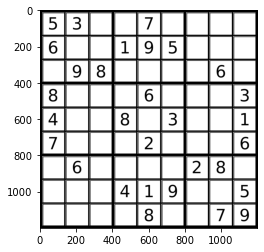

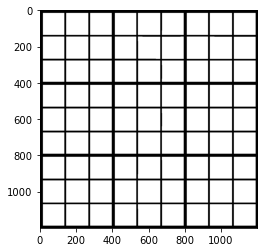

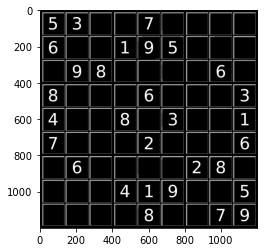

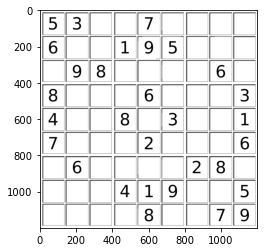

In [22]:
bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)

plotting = plt.imshow(img,cmap='gray')
plt.show()

plotting = plt.imshow(img_vh,cmap='gray')
plt.show()

plotting = plt.imshow(bitxor,cmap='gray')
plt.show()

plotting = plt.imshow(bitnot,cmap='gray')
plt.show()

In [23]:
#ocr 
outer = []
for i in range(len(finalbbox)):
    for j in range(len(finalbbox[i])):
        inner = 0
        if(len(finalbbox[i][j])==0):
            outer.append(0)
        else:
            for k in range(len(finalbbox[i][j])):
                y,x,w,h = finalbbox[i][j][k][0], finalbbox[i][j][k][1],finalbbox[i][j][k][2],finalbbox[i][j][k][3]
                finalimg = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,1))
                border = cv2.copyMakeBorder(finalimg, 2,2,2,2,cv2.BORDER_CONSTANT, value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel, iterations=8)
                erosion = cv2.erode(dilation, kernel, iterations=10)
                
                #plotting = plt.imshow(finalimg,cmap='gray')
                #plt.show()
                
                out = pytesseract.image_to_string(erosion, lang='eng',config='--psm 13 --oem 3 -c tessedit_char_whitelist=0123456789')
                
                inner = out
                outer.append(inner)                   

In [24]:
sudoku_array = np.array(outer)
df = pd.DataFrame(sudoku_array.reshape(len(rows), 9))

new_array = [0 if x =='\x0c' else int(x) for x in sudoku_array]

sudoku_array = np.array(new_array)
sudoku_array.resize((9,9))
sudoku_array
sudoku = sudoku_array
sudoku

array([[5, 3, 0, 0, 7, 0, 0, 0, 0],
       [6, 0, 0, 1, 9, 5, 0, 0, 0],
       [0, 9, 8, 0, 0, 0, 0, 6, 0],
       [8, 0, 0, 0, 6, 0, 0, 0, 3],
       [4, 0, 0, 8, 0, 3, 0, 0, 1],
       [7, 0, 0, 0, 2, 0, 0, 0, 6],
       [0, 6, 0, 0, 0, 0, 2, 8, 0],
       [0, 0, 0, 4, 1, 9, 0, 0, 5],
       [0, 0, 0, 0, 8, 0, 0, 7, 9]])

In [25]:
def PrintImage(sudoku):
    print("\n")
    for i in range(len(sudoku)):
        line = ""
        if i == 3 or i == 6:
            print("---------------------")
        for j in range(len(sudoku[i])):
            if j == 3 or j == 6:
                line += "| "
            line += str(sudoku[i,j])+" "
        print(line)

def FixedValues(fixed_sudoku):
    for i in range (0,9):
        for j in range (0,9):
            if fixed_sudoku[i,j] != 0:
                fixed_sudoku[i,j] = 1
    
    return(fixed_sudoku)

def NumberOfErrors(sudoku):
    numberOfErrors = 0 
    for i in range (0,9):
        numberOfErrors += NumberOfErrorsRowColumn(i ,i ,sudoku)
    return(numberOfErrors)

def NumberOfErrorsRowColumn(row, column, sudoku):
    numberOfErrors = (9 - len(np.unique(sudoku[:,column]))) + (9 - len(np.unique(sudoku[row,:])))
    return(numberOfErrors)


def CreateListSquaresBlocks ():
    finalListOfBlocks = []
    for r in range (0,9):
        tmpList = []
        block1 = [i + 3*((r)%3) for i in range(0,3)]
        block2 = [i + 3*math.trunc((r)/3) for i in range(0,3)]
        for x in block1:
            for y in block2:
                tmpList.append([x,y])
        finalListOfBlocks.append(tmpList)
    return(finalListOfBlocks)

def RandomlyFillSquares(sudoku, listOfBlocks):
    for block in listOfBlocks:
        for box in block:
            if sudoku[box[0],box[1]] == 0:
                currentBlock = sudoku[block[0][0]:(block[-1][0]+1),block[0][1]:(block[-1][1]+1)]
                sudoku[box[0],box[1]] = choice([i for i in range(1,10) if i not in currentBlock])
    return sudoku

def SumOfOneBlock (sudoku, oneBlock):
    finalSum = 0
    for box in oneBlock:
        finalSum += sudoku[box[0], box[1]]
    return(finalSum)

def TwoRandomBoxesWithinBlock(fixedSudoku, block):
    while (1):
        firstBox = random.choice(block)
        secondBox = choice([box for box in block if box is not firstBox ])

        if fixedSudoku[firstBox[0], firstBox[1]] != 1 and fixedSudoku[secondBox[0], secondBox[1]] != 1:
            return([firstBox, secondBox])

def FlipBoxes(sudoku, boxesToFlip):
    proposedSudoku = np.copy(sudoku)
    placeHolder = proposedSudoku[boxesToFlip[0][0], boxesToFlip[0][1]]
    proposedSudoku[boxesToFlip[0][0], boxesToFlip[0][1]] = proposedSudoku[boxesToFlip[1][0], boxesToFlip[1][1]]
    proposedSudoku[boxesToFlip[1][0], boxesToFlip[1][1]] = placeHolder
    return (proposedSudoku)

def ProposedState (sudoku, fixedSudoku, listOfBlocks):
    randomBlock = random.choice(listOfBlocks)

    if SumOfOneBlock(fixedSudoku, randomBlock) > 6:  
        return(sudoku, 1, 1)
    boxesToFlip = TwoRandomBoxesWithinBlock(fixedSudoku, randomBlock)
    proposedSudoku = FlipBoxes(sudoku,  boxesToFlip)
    return([proposedSudoku, boxesToFlip])

def ChooseState (currentSudoku, fixedSudoku, listOfBlocks, initialTemp):    
    proposal = ProposedState(currentSudoku, fixedSudoku, listOfBlocks)    
    newSudoku = proposal[0]
    boxesToCheck = proposal[1]
    currentCost = NumberOfErrorsRowColumn(boxesToCheck[0][0], boxesToCheck[0][1], currentSudoku) + NumberOfErrorsRowColumn(boxesToCheck[1][0], boxesToCheck[1][1], currentSudoku)
    newCost = NumberOfErrorsRowColumn(boxesToCheck[0][0], boxesToCheck[0][1], newSudoku) + NumberOfErrorsRowColumn(boxesToCheck[1][0], boxesToCheck[1][1], newSudoku)
    costDifference = newCost - currentCost
    rho = math.exp(-costDifference/initialTemp)
    if(np.random.uniform(1,0,1) < rho):
        return([newSudoku, costDifference])
    return([currentSudoku, 0])

def NumberOfIterations(fixed_sudoku):
    numberOfItterations = 0
    for i in range (0,9):
        for j in range (0,9):
            if fixed_sudoku[i,j] != 0:
                numberOfItterations += 1
    return numberOfItterations

def CalculateInitialTemp (sudoku, fixedSudoku, listOfBlocks):
    listOfDifferences = []
    tmpSudoku = sudoku
    for i in range(1,10):
        tmpSudoku = ProposedState(tmpSudoku, fixedSudoku, listOfBlocks)[0]
        listOfDifferences.append(NumberOfErrors(tmpSudoku))
    return (statistics.pstdev(listOfDifferences))


def solveSudoku (sudoku):
    solution = 0
    while (solution == 0):
        decreaseFactor = 0.99          
        fixedSudoku = np.copy(sudoku)
        
        FixedValues(fixedSudoku)
        listOfBlocks = CreateListSquaresBlocks()
        tmpSudoku = RandomlyFillSquares(sudoku, listOfBlocks)
        initialTemp = CalculateInitialTemp(sudoku, fixedSudoku, listOfBlocks)
        score = NumberOfErrors(tmpSudoku)
        iterations = NumberOfIterations(fixedSudoku)
        if score <= 0:
            solution = 1

        while solution == 0:
            prevScore = score
            for i in range (0, iterations):
                newState = ChooseState(tmpSudoku, fixedSudoku, listOfBlocks, initialTemp)
                tmpSudoku = newState[0]
                scoreDiff = newState[1]
                score += scoreDiff
                if score <= 0:
                    solution = 1
                    break

            initialTemp *= decreaseFactor
            if score <= 0:
                solution = 1
                break          
            if(NumberOfErrors(tmpSudoku)==0):
                PrintImage(tmpSudoku)
                break
    return(tmpSudoku)

PrintImage(sudoku)
PrintImage(solveSudoku(sudoku))





5 3 0 | 0 7 0 | 0 0 0 
6 0 0 | 1 9 5 | 0 0 0 
0 9 8 | 0 0 0 | 0 6 0 
---------------------
8 0 0 | 0 6 0 | 0 0 3 
4 0 0 | 8 0 3 | 0 0 1 
7 0 0 | 0 2 0 | 0 0 6 
---------------------
0 6 0 | 0 0 0 | 2 8 0 
0 0 0 | 4 1 9 | 0 0 5 
0 0 0 | 0 8 0 | 0 7 9 


5 3 4 | 6 7 8 | 9 1 2 
6 7 2 | 1 9 5 | 3 4 8 
1 9 8 | 3 4 2 | 5 6 7 
---------------------
8 5 9 | 7 6 1 | 4 2 3 
4 2 6 | 8 5 3 | 7 9 1 
7 1 3 | 9 2 4 | 8 5 6 
---------------------
9 6 1 | 5 3 7 | 2 8 4 
2 8 7 | 4 1 9 | 6 3 5 
3 4 5 | 2 8 6 | 1 7 9 


In [26]:
np.random.uniform(1,0,1)

array([0.90617023])